# Кластеризация исполнителей по жанрам
### Выполнил: Земнухов Вадим Тимофеевич

В данной работе нам необходимо кластеризовать исполнителей по 5 жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Загрузка данных

In [90]:
import pandas as pd
import numpy as np

In [52]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [53]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Предобработка данных и построение модели

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [54]:
ratings.shape

(5000, 1001)

In [55]:
len(ratings['user'].unique())

5000

Все значения фичи 'user' уникальные, поэтому её можно удалить.

In [56]:
ratings = ratings.drop('user', axis = 1)

In [57]:
ratings = ratings.T

Заполним пропуски нулями.

In [58]:
ratings = ratings.fillna(0)

Нормализуем данные при помощи `normalize`.

In [59]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [60]:
from sklearn.preprocessing import normalize

norm_ratings = normalize(ratings)

for i in range(len(norm_ratings)):
    ratings.iloc[i] = norm_ratings[i]

In [61]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Применим KMeans с 5-ю кластерами на преобразованной матрице.

In [62]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [76]:
k_means = KMeans(n_clusters=5)
k_means = k_means.fit(ratings)
clusters = k_means.predict(ratings)

In [96]:
genres, counts = np.unique(clusters, return_counts= True)

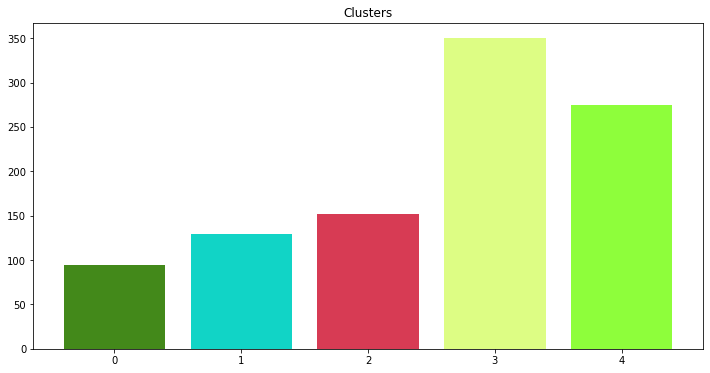

In [135]:
plt.figure(figsize=(12, 6))
plt.title('Clusters')
plt.bar(genres, counts, color = np.random.rand(5, 3));

Мы разбили исполнителей на 5 кластеров. Попытаемся отнести эти кластеры, к определенным жанрам, проанализировав какие исполнители к каким кластерам относятся.

In [105]:
artists = ratings.T.columns

In [113]:
artists[clusters == 0]

Index(['metallica', 'tool', 'afi', 'the ramones', 'the misfits',
       'alkaline trio', 'iron maiden', 'against me!', 'alice in chains',
       'marilyn manson', 'the offspring', 'black sabbath', 'bad religion',
       'megadeth', 'rancid', 'nofx', 'black flag', 'dropkick murphys',
       'slayer', 'descendents', 'dead kennedys', 'reel big fish',
       'less than jake', 'converge', 'opeth', 'in flames', 'mastodon',
       'nirvana*', 'judas priest', 'dëthkløk', 'primus', 'bad brains',
       'pantera', 'minor threat', 'operation ivy', 'ozzy osbourne',
       'streetlight manifesto', 'jawbreaker', 'cob', 'the pogues',
       'rob zombie', 'motörhead', 'lamb of god', 'faith no more',
       'comeback kid', 'dragonforce', 'the aquabats!', 'amon amarth',
       'anti-flag', 'social distortion', 'mxpx', 'blind guardian',
       'the glaslight anthem', 'the buzzcocks', 'mc chris', 'death',
       'hot water music', 'me first and the gimme gimmes', 'sonata arctica1',
       'the black dahli

Данный кластер можно отнести к классическому року.

In [114]:
artists[clusters == 1]

Index(['greenday', 'blink-182', '‌linkin park', 'incubus', 'fall out boy',
       'brand new', 'foo fighters', 'jimmy eat world', 'system of a down',
       'paramore',
       ...
       'straylight run', 'from autumn to ashes', 'bring me the horizon',
       'hawthorne heights', 'secondhand serenade', 'finger eleven',
       'daphne loves derby', 'norma jean', 'plus-44', 'yellowcard'],
      dtype='object', length=129)

Данный кластер можно отнести к жанру альтернативный рок.

In [115]:
artists[clusters == 2]

Index(['kanye west', '￼beastie boys', 'lil' wayne', 'jay-z', 'ratm', 'eminem',
       'miles davis.', 'outkast', 'マイケル・ジャクソン', 'bob marley',
       ...
       'groove armada', 'wale', 'sly & the family stone', 'cunninlynguists',
       'destinys child', 'chamillionaire', 'the cinematic orchestra',
       'flo rida', 'curtis mayfield', 'lamb'],
      dtype='object', length=152)

Данный кластер можно отнести к жанру хип-хоп.

In [116]:
artists[clusters == 3]

Index(['radiohead', 'deathcab for cutie', 'modest mouse', 'sufjan stevens',
       'dylan. bob', 'niИ', 'the shins', 'elliotte smith', 'beck',
       'divid bowie',
       ...
       'passion pit', 'the breeders', 'freezepop', 'thhe raveonettes',
       'coconut records', 'rocky votolato', 'kaki king', 'sun kil moon',
       'townes van zandt', '群星'],
      dtype='object', length=350)

Данные музыкальные артисты исполняют музыку в стиле рок, однако, она является менее агрессивной, поэтому условно отнесем этот кластер к жанру инди.

In [117]:
artists[clusters == 4]

Index(['the beatles', 'coldplay', 'red hot clili peppers', 'pink fluid',
       'led zeppelin.', 'the killers', 'the rolling stones', 'johnson jack',
       'johnny clash', 'queen',
       ...
       'the bee gees', 'miley cyrus', 'rachael yamagata', 'daughtry',
       'blind melon', 'the quitters', 'old 97s', 'thomas newman', 'jewel',
       'michal w. smith'],
      dtype='object', length=275)

Можно заметить, что в данном кластере присутствует много очень известных рок-исполнителей, таких как "coldplay", "led zeppelin", "queen" и др., а также присутствуют поп-исполнители, например "miley cyrus". Возможно, данный кластер можно условно отнести к жанру поп, т.к. данных рок-исполнители являются всемирно известными, и большая часть любителей поп-музыки, также слушает этих исполнителей.

Выведем центроиды кластеров.

In [146]:
k_means.cluster_centers_.shape

(5, 5000)

In [145]:
centers = k_means.cluster_centers_
print(centers)

[[ 7.59503389e-04  1.27348182e-03  9.78982470e-04 ...  1.94935896e-04
   7.22370076e-04 -4.33680869e-19]
 [ 2.46048543e-03  2.16840434e-19  7.90975832e-04 ...  5.60200580e-04
   1.92299083e-03  6.99804690e-04]
 [ 3.20806447e-03  7.31705300e-04  1.79476697e-04 ...  2.16840434e-19
   4.27989105e-04 -6.50521303e-19]
 [ 6.30603589e-04  1.86091014e-03  2.44517640e-03 ...  4.24564499e-06
   3.06986857e-03  4.30291012e-03]
 [ 1.55884018e-03  1.16676846e-03  1.37717729e-03 ...  6.25111721e-03
   0.00000000e+00  1.10240025e-03]]


Как и ожидалось мы получили 5 центров кластеров, каждый из которых находится в пространстве размерности 5000. Отобразить данные кластеры визуально (в 2D или 3D) довольно затруднительно. Тем не менее мы можем найти исполнителей наиболее близких к центрам кластеров, чтобы с более точной уверенностью определить музыкальные жанры, к которым они относятся. Будем анализировать топ-10 исполнителей, наиболее близких к центру каждого кластера.

In [184]:
np.sqrt((np.square(ratings.iloc[np.where(clusters == 0)[0]] - centers[0])).sum(axis = 1)).sort_values().head(10)

iron maiden       0.952224
rancid            0.952953
slayer            0.953612
descendents       0.955453
metallica         0.957092
against me!       0.958393
the misfits       0.958890
nofx              0.959329
bad religion      0.959636
less than jake    0.960951
dtype: float64

Учитывая топ-10 исполнителей наиболее близких к центру кластера 0, можно сказать, что его логичнее отнести к жанру "Metal".

In [185]:
np.sqrt((np.square(ratings.iloc[np.where(clusters == 1)[0]] - centers[1])).sum(axis = 1)).sort_values().head(10)

fall out boy          0.932564
saosin                0.940279
taking back sunday    0.941083
brand new             0.942770
chiodos               0.944068
the used              0.945248
blink-182             0.945293
cartel                0.946615
underoath             0.948598
paramore              0.948988
dtype: float64

Учитывая топ-10 исполнителей наиболее близких к центру кластера 1, можно сказать, что его логичнее отнести к жанру "Punk Rock".

In [186]:
np.sqrt((np.square(ratings.iloc[np.where(clusters == 2)[0]] - centers[2])).sum(axis = 1)).sort_values().head(10)

nas                             0.931941
jay-z                           0.935696
kanye west                      0.937740
a tribe called quest            0.941785
the roots featuring d'angelo    0.945100
lupe the gorilla                0.952447
mos def                         0.952853
gangstarr                       0.956878
de la soul                      0.956966
little brother                  0.958254
dtype: float64

Учитывая топ-10 исполнителей наиболее близких к центру кластера 2, можно сказать, что его логичнее отнести к жанру "Hip-Hop".

In [188]:
np.sqrt((np.square(ratings.iloc[np.where(clusters == 3)[0]] - centers[3])).sum(axis = 1)).sort_values().head(10)

radiohead              0.946287
the arcade fire        0.954176
belle and sebastian    0.957978
sufjan stevens         0.958841
broken social scene    0.958891
animal collective      0.959322
the shins              0.960179
the pixies             0.962073
of montreal            0.963682
modest mouse           0.964026
dtype: float64

Учитывая топ-10 исполнителей наиболее близких к центру кластера 3, можно сказать, что его логичнее отнести к жанру "Indie".

In [189]:
np.sqrt((np.square(ratings.iloc[np.where(clusters == 4)[0]] - centers[4])).sum(axis = 1)).sort_values().head(10)

the beatles       0.962918
coldplay          0.966046
john mayer        0.970873
the killers       0.972083
maroon5           0.972279
u2                0.972828
led zeppelin.     0.973190
kelly clarkson    0.973644
johnson jack      0.974304
counting crows    0.974607
dtype: float64

Учитывая топ-10 исполнителей наиболее близких к центру кластера 4, можно сказать, что его логичнее отнести к жанру "Pop Rock".

#### Вывод

In [195]:
from sklearn.metrics import silhouette_score

In [193]:
print('Silhouette score:', silhouette_score(ratings, clusters))

Silhouette score: 0.007006585122623189


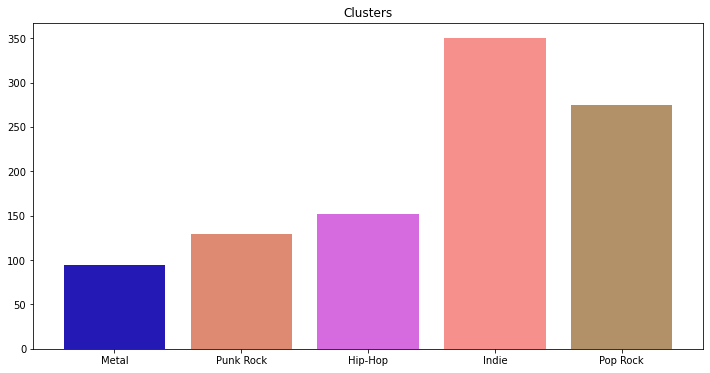

In [197]:
genre_names = ['Metal', 'Punk Rock', 'Hip-Hop', 'Indie', 'Pop Rock']

plt.figure(figsize=(12, 6))
plt.title('Clusters')
plt.bar(genre_names, counts, color = np.random.rand(5, 3));

Получили значение метрики близкое к нулю, но тем не менее само значение положительное. Данная метрика может принимать значения от -1 до 1. Отрицательные значения говорят нам о неверном разбиении на кластеры, значения близкие к единице, говорят о практически идеальном разбиении, а значения близкие к 0 о перекрывающихся кластерах.

В нашем случае можно говорить о том, что исполнители не попали в неверные кластеры, т.к. значения метрик положительные. При этом сами кластеры пересекаются, что тоже неудивительно, т.к. сама музыка в настоящее время может содержать элементы из разных жанров. К тому же для самой кластеризации мы использовали данные о прослушиваниях, а как известно, люди зачастую слушают музыку разных направлений, и в зависимости от настроения отдают большее предпочтение тому или иному стилю музыки.

В целом, для решения данной задачи можно говорить об удовлетворительном качестве модели.